In [29]:

import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import io
import soundfile as sf
import noisereduce as nr
%matplotlib inline

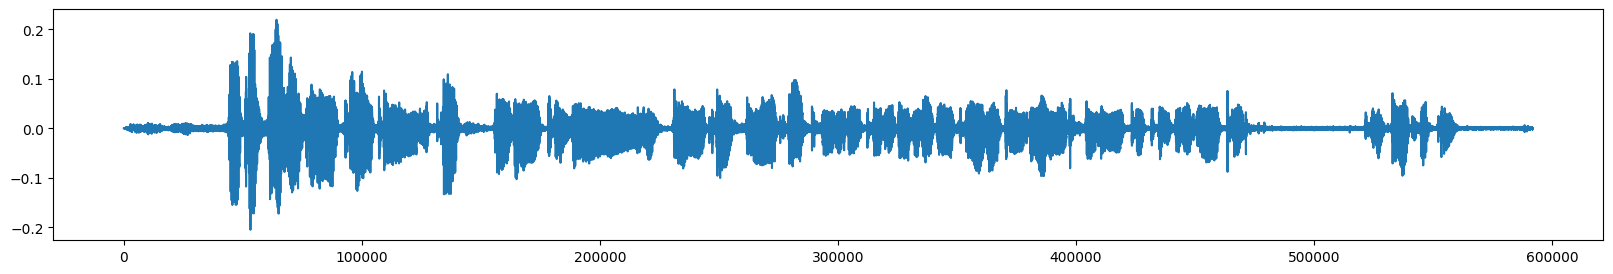

In [19]:
path = "../sample_audios/tikvah.wav"
data, rate = sf.read(path)
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [22]:
IPython.display.Audio(data=data, rate=rate) 

## Add Noise

In [20]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

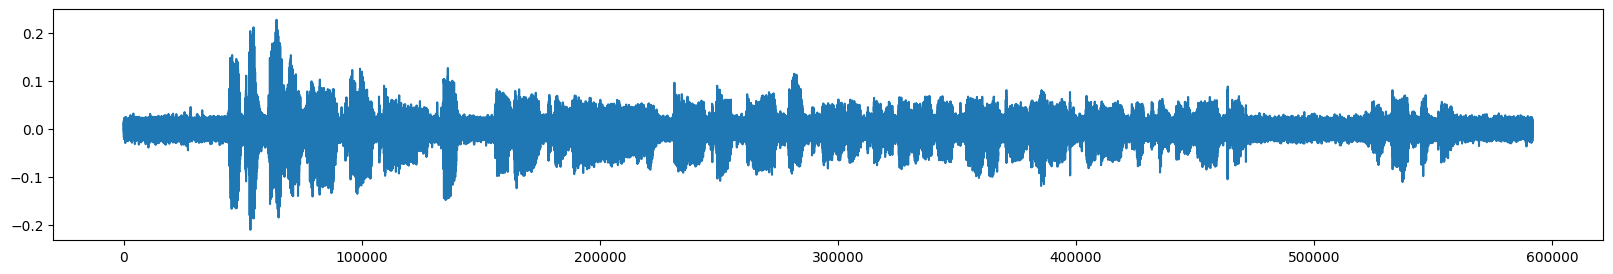

In [21]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [23]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

## Stationary Noise Removal

In [36]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.2,stationary=True)

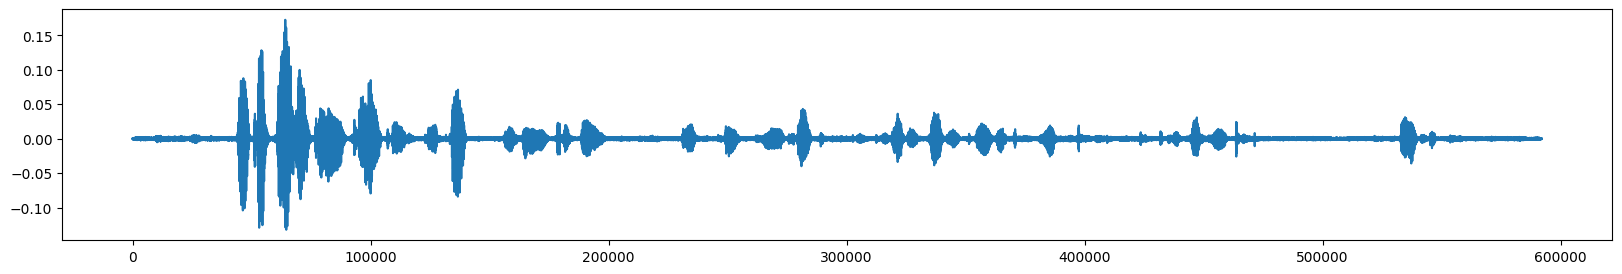

In [37]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [38]:
IPython.display.Audio(data=reduced_noise, rate=rate)

## Non-stationary noise reduction

In [39]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

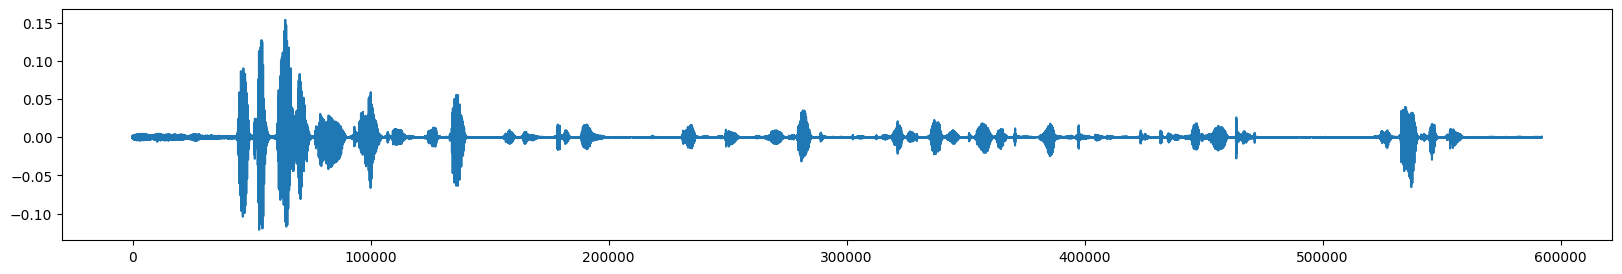

In [40]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [41]:
IPython.display.Audio(data=reduced_noise, rate=rate)

## Ensure that noise reduction doesn't cayse distortion when prop_decrease==0

In [42]:
noise_reduced = nr.reduce_noise(y=data, sr=rate, prop_decrease=0, stationary=False)

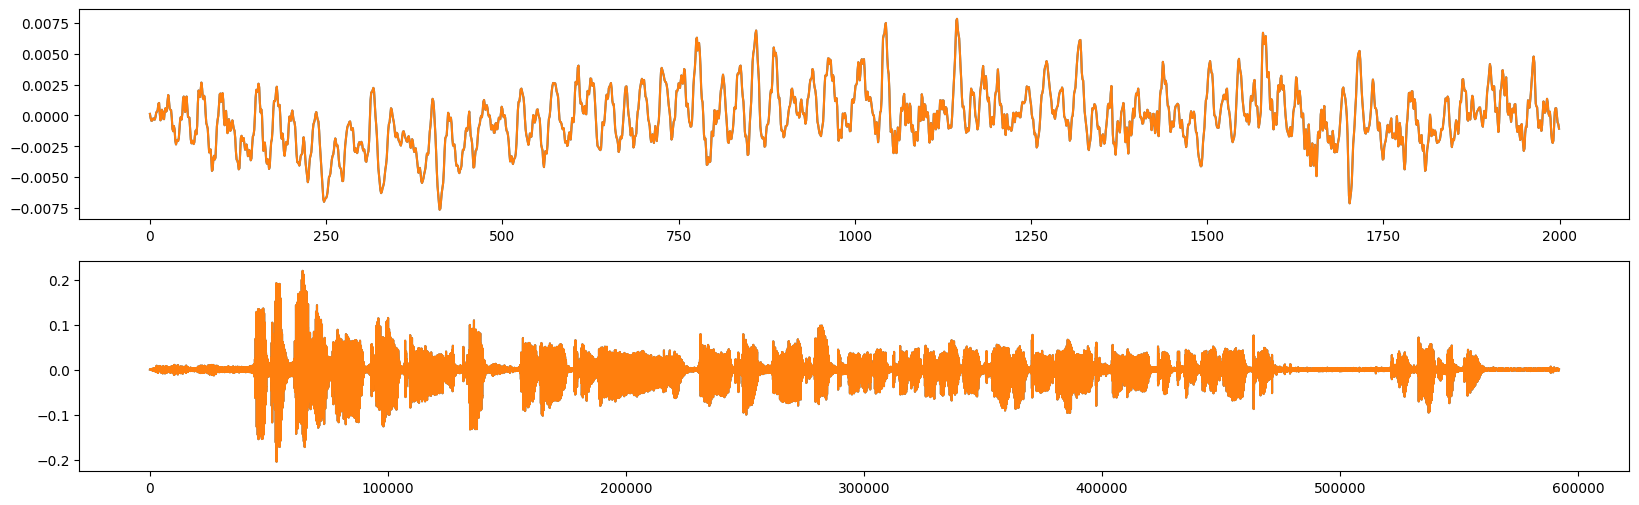

In [43]:
fig, axs = plt.subplots(nrows=2, figsize=(20,6))
axs[0].plot(data[3000:5000])
axs[0].plot(noise_reduced[3000:5000])
axs[1].plot(data)
axs[1].plot(noise_reduced)

In [44]:
IPython.display.Audio(data=reduced_noise, rate=rate)